# *How to think like a computer scientist**
### Thunder Shiviah (github.com/ThunderShiviah)

##### *Disclaimer: I am not a computer scientist

# A few words about my background

# What this talk is about
* Using abstraction to manage complexity

## The hardest part of programming?


# Examples of complexity

* Major multi-million dollar projects without single working line of code

>Development of the website that would process online enrollments was done by Oracle Corporation and managed by the state of Oregon rather than an independent systems integrator.[11] The project was plagued by numerous management and technological issues, and though the website was supposed to begin processing enrollments on October 1, by mid-October, it was unable to process any enrollments.[12] 

>As of mid-December 2013, the deadline for enrollment for coverage beginning January 1, the state had spent nearly \$160 million and the site still could not process online enrollments.[11] Governor John Kitzhaber informed Oregon residents that they should obtain a paper application and mail it in to obtain coverage. 

* Radiation overdoses

>The Therac-25 was a radiation therapy machine produced by Atomic Energy of Canada Limited...

>**It was involved in at least six accidents between 1985 and 1987, in which patients were given massive overdoses of radiation. Because of concurrent programming errors, it sometimes gave its patients radiation doses that were thousands of times greater than normal, resulting in death or serious injury.**[2] These accidents highlighted the dangers of software control of safety-critical systems...

>**A commission concluded that the primary reason should be attributed to the bad software design and development practices, and not explicitly to several coding errors that were found. In particular, the software was designed so that it was realistically impossible to test it in a clean automated way.**[5]

* The list goes on and on

# How do we deal with complexity?

* Make it simple

**Elegance is power cloaked in simplicity** -- Robins and Beebe, *classic shell scripting*

# Algorithms

# A motivating problem

Find out if an element is in your data.

# Why we care

* Databases

# How is our data stored?

* Lots of possibilities: str, list, dict, tuple, set etc.

# Does our list contain a certain element?

In [1]:
from random import randrange 

def get_rand_list(n=10, upper_num=100):
    """Returns a  list of random numbers.
    
    Parameters
    ----------
    upper_num: int
        Sets the lower and upper bound for our random numbers
    n: int
        Sets the number of elements in our list.
        
    Returns
    -------
    list
    """
    return [randrange(upper_num) for x in range(n)] # returns a list of n random numbers  

lst = get_rand_list()
print("list = ", lst)

list =  [79, 88, 55, 3, 2, 86, 34, 92, 53, 22]


In [2]:

####### Exercise #######

def list_search(elem, lst):
    """ Returns True if elem is in lst and False otherwise."""
    return elem in lst

####### Tests #######

def list_search_pass_test():
    lst = [1,2,3,4]
    assert list_search(3, lst) == True
    

def list_search_fail_test():
    lst = [1,2,3,4]
    assert list_search(6, lst) == False

    
lst = get_rand_list()
elem = 71    
print("Element is in list: {bool}".format(bool=list_search(elem, lst)))

Element is in list: False


### How can we check?
Start at the beginning and check every element (brute force).

In [3]:
####### Exercise #######

def brute_force_search(elem, lst):
    """Returns True if elem is in lst and False otherwise."""
    
    bool_lst = [elem for num in lst if elem == num]
    return any(bool_lst) # returns false if bool_lst is empty
            

####### Tests #######

def brute_force_search_pass_test():
    lst = [1,2,3,4]
    assert brute_force_search(3, lst) == True
    

def brute_force_search_fail_test():
    lst = [1,2,3,4]
    assert brute_force_search(6, lst) == False
    

brute_force_search_pass_test()
brute_force_search_fail_test()

### Brute force method

* best case?

* worst case?

* what if the list is randomized? What's our average performance?

* Exercise using timeit
  * How does each case depend on the number of elements in the list?

<table style="border: 1px #aaa solid">
<tr>
<th style="background:#edf; text-align: center" colspan="2">Prefix</th>
<th style="background:#edf; text-align: center" rowspan="2">1000<sup><i>m</i></sup></th>
<th style="background:#edf; text-align: center" rowspan="2">10<sup><i>n</i></sup></th>
<th style="background:#edf; text-align: center" rowspan="2"><a href="/wiki/Decimal" title="Decimal">Decimal</a></th>
<th style="background:#edf; text-align: center" colspan="2">English word</th>
<th style="background:#edf; text-align: center" rowspan="2">Since<sup id="cite_ref-4" class="reference"><a href="#cite_note-4"><span>[</span>nb 1<span>]</span></a></sup></th>
</tr>
<tr>
<th style="background:#edf; text-align: center">Name</th>
<th style="background:#edf; text-align: center">Symbol</th>
<th style="background:#edf; text-align: left"><a href="/wiki/Short_scale" title="Short scale" class="mw-redirect">Short scale</a></th>
<th style="background:#edf; text-align: left"><a href="/wiki/Long_scale" title="Long scale" class="mw-redirect">Long scale</a></th>
</tr>
<tr style="background-color:#EEE">
<td colspan="2"></td>
<td style="text-align:left;">&#160;1000<sup>0</sup></td>
<td style="text-align:left;">&#160;<a href="/wiki/1_(number)" title="1 (number)">10<sup>0</sup></a></td>
<td style="text-align:center;">1</td>
<td style="text-align:left;" colspan="2">&#160; &#160; &#160; &#160; &#160; &#160; one</td>
<td>–</td>
</tr>
<tr style="background-color:#FFF">
<td><a href="/wiki/Deci-" title="Deci-">deci</a></td>
<td style="text-align:center;">d</td>
<td style="text-align:left;">&#160;1000<sup>−1/3</sup></td>
<td style="text-align:left;">&#160;<a href="/wiki/Orders_of_magnitude_(numbers)#10.E2.88.921" title="Orders of magnitude (numbers)">10<sup>−1</sup></a></td>
<td style="text-align:left;">0.1</td>
<td style="text-align:left;" colspan="2">&#160; &#160; &#160; &#160; &#160; &#160; tenth</td>
<td>1960&#160;(1795)</td>
</tr>
<tr style="background-color:#FFF">
<td><a href="/wiki/Centi-" title="Centi-">centi</a></td>
<td style="text-align:center;">c</td>
<td style="text-align:left;">&#160;1000<sup>−2/3</sup>&#160;</td>
<td style="text-align:left;">&#160;<a href="/wiki/Orders_of_magnitude_(numbers)#10.E2.88.922" title="Orders of magnitude (numbers)">10<sup>−2</sup></a></td>
<td style="text-align:left;">0.01</td>
<td style="text-align:left;" colspan="2">&#160; &#160; &#160; &#160; &#160; &#160; hundredth</td>
<td>1960&#160;(1795)</td>
</tr>
<tr>
<td><a href="/wiki/Milli-" title="Milli-">milli</a></td>
<td style="text-align:center;">m</td>
<td style="text-align:left;">&#160;1000<sup>−1</sup></td>
<td style="text-align:left;">&#160;<a href="/wiki/Orders_of_magnitude_(numbers)#10.E2.88.923" title="Orders of magnitude (numbers)">10<sup>−3</sup></a></td>
<td style="text-align:left;">0.001</td>
<td style="text-align:left;" colspan="2">&#160; &#160; &#160; &#160; &#160; &#160; thousandth</td>
<td>1960&#160;(1795)</td>
</tr>
<tr>
<td><strong class="selflink">micro</strong></td>
<td style="text-align:center;">μ</td>
<td style="text-align:left;">&#160;1000<sup>−2</sup></td>
<td style="text-align:left;">&#160;<a href="/wiki/Orders_of_magnitude_(numbers)#10.E2.88.926" title="Orders of magnitude (numbers)">10<sup>−6</sup></a></td>
<td style="text-align:left;"><span style="white-space:nowrap">0.000<span style="margin-left:0.2em">001</span></span></td>
<td style="text-align:left;" colspan="2">&#160; &#160; &#160; &#160; &#160; &#160; millionth</td>
<td>1960&#160;(1873)</td>
</tr>
<tr>
<td><a href="/wiki/Nano-" title="Nano-">nano</a></td>
<td style="text-align:center;">n</td>
<td style="text-align:left;">&#160;1000<sup>−3</sup></td>
<td style="text-align:left;">&#160;<a href="/wiki/Orders_of_magnitude_(numbers)#10.E2.88.929" title="Orders of magnitude (numbers)">10<sup>−9</sup></a></td>
<td style="text-align:left;"><span style="white-space:nowrap">0.000<span style="margin-left:0.2em">000</span><span style="margin-left:0.2em">001</span></span></td>
<td style="text-align:left;">&#160;billionth</td>
<td style="text-align:left;">&#160;thousand&#160;millionth</td>
<td>1960</td>
</tr>
<tr>
<td colspan="8" style="font-size:small;background:#EEE"></td>
</tr>
</table>
</td>
</tr>
</table>

### Idea: what if our list was sorted?
* A smarter search algorithm?

### Binary Search

We consider three cases:

* If the target equals data[mid], then we have found the item we are looking
for, and the search terminates successfully.

* If target < data[mid], then we recur on the first half of the sequence, that is,
on the interval of indices from low to mid − 1.

* If target > data[mid], then we recur on the second half of the sequence, that
is, on the interval of indices from mid + 1 to high.
An unsuccessful search occurs if low > high, as the interval [low, high] is empty.

In [4]:
"""
def binary_search(elem, lst):
    assert lst == sorted(lst), 'list must be sorted for binary search'
    first = 0
    last = len(lst)-1
    found = False

    while first<=last and not found:
        midpoint = (first + last)//2
        if lst[midpoint] == elem:
            found = True
        else:
            if elem < lst[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1

    return found
"""

def binary_search(item, alist):
    if len(alist) == 0:
        return False
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
            return True
        else:
            if item<alist[midpoint]:
                return binary_search(item, alist[:midpoint])
            else:
                return binary_search(item, alist[midpoint+1:])

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(binary_search(3, testlist))
print(binary_search(13, testlist))

False
True


In [5]:
#lst = sorted(get_rand_list())
lst = get_rand_list()
lst

[81, 30, 57, 24, 48, 23, 44, 76, 77, 36]

In [6]:
binary_search(68, sorted(lst))

False

* Exercise using timeit
  * How does each case depend on the number of elements in the list?

# Divide and conquer

### problems with comparing binary search to brute force

* number of items in list

* hardware

# Big O notation



![./newplot.png](./newplot.png)

In [7]:
from time import time

def func_timer(func, *params, verbose=False):
    """Takes in a function and some parameters to the function and returns the execution time"""
    start = time()
    func(*params)
    t = time() - start
    if verbose:
        print('function {func_name} took {time} seconds to complete given parameters'.format(
                func_name=func.__name__, time=t))
    return t

elem, n = 50, 10000
print(func_timer(brute_force_search, elem, get_rand_list(n), verbose=True))
print()
print(func_timer(list_search, elem, get_rand_list(n), verbose=True))
print()
print(func_timer(binary_search, elem, sorted(get_rand_list(n)), verbose=True))

function brute_force_search took 0.0005748271942138672 seconds to complete given parameters
0.0005748271942138672

function list_search took 1.3589859008789062e-05 seconds to complete given parameters
1.3589859008789062e-05

function binary_search took 1.1920928955078125e-05 seconds to complete given parameters
1.1920928955078125e-05


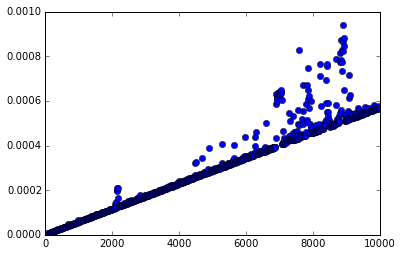

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt



def sort_compare(max_size, num_samples, func):
    """Returns two lists corresponding to the lengths of random lists and the runtime
       execution of function func on those lists.
       """
    assert max_size > num_samples
    delta = max_size // num_samples # uses the floor function to get difference between each sample.
    lst_lengths = [delta*x for x in range(num_samples)] 
    lst_of_rand_lsts = [get_rand_list(x) for x in lst_lengths]
    func_times_lst = [func_timer(func, 50, lst) for lst in lst_of_rand_lsts]
    
    return lst_lengths, func_times_lst

def set_compare(max_size, num_samples, func):
    """Returns two lists corresponding to the lengths of random lists and the runtime
       execution of function func on those lists.
       """
    assert max_size > num_samples
    delta = max_size // num_samples # uses the floor function to get difference between each sample.
    lst_lengths = [delta*x for x in range(num_samples)] 
    lst_of_rand_lsts = [get_rand_list(x) for x in lst_lengths]
    func_times_lst = [func_timer(func, lst) for lst in lst_of_rand_lsts]
    
    return lst_lengths, func_times_lst
    
    
def subplot_generator(lst_lengths, func_times_lst):
    plt.plot(lst_lengths, func_times_lst, 'bo')
    return
    

def sort_plotter(max_size, num_samples, *funcs):
    """Plots functions vs execution time.
    
    Details
    -------
    Creates plots of each function in *funcs wrt 
    execution time by sampling num_samples lists of incremental
    length up to length max_size.
    
    Parameters
    ----------
    max_size: int
        The length of the final list sampled.
    num_samples: int
        The number of times to sample_the function.
    *functs: iterator
        An iterator containing the functions we wish to sample.
    
    Returns
    -------
    plots: matplotlib.pyplot
        Returns subplots with the length of the sampled 
    list as the x-axis, and the average runtime of the 
    function over the list using timeit.
    NOTE: timeit defaults to 1000 function calls.
        
    """
 
    print(type(funcs))
    # sort_compare(max_size, num_samples, func)

    return

lst_lengths, func_times_lst = sort_compare(10000, 1000, brute_force_search)
subplot_generator(lst_lengths, func_times_lst)


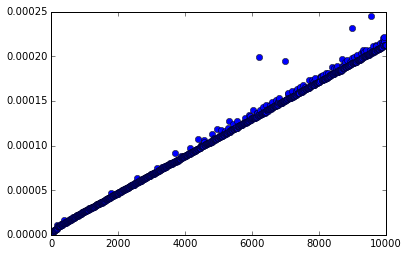

In [9]:
lst_lengths, func_times_lst = set_compare(10000, 1000, set)
subplot_generator(lst_lengths, func_times_lst)

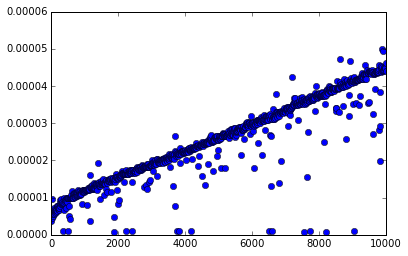

In [10]:
lst_lengths, func_times_lst = sort_compare(10000, 1000, binary_search)
subplot_generator(lst_lengths, func_times_lst)

* Brute force: O(n)
* Binary search: O(log(n))

## Examples of other searches and sorting
* [Mike Bostock](http://bost.ocks.org/mike/algorithms/)

<span class="anchor" id="line-9"></span><div><table style="width:"><tbody><tr>  <td><p class="line891"><strong>Operation</strong> </td>
  <td><p class="line891"><strong>Average Case</strong> </td>
  <td><p class="line891"><strong><a class="http" href="http://en.wikipedia.org/wiki/Amortized_analysis">Amortized Worst Case</a></strong> </td>
</tr>
<tr>  <td><span class="anchor" id="line-10"></span><p class="line862">Copy </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862">O(n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-11"></span><p class="line862">Append[1] </td>
  <td><p class="line862">O(1) </td>
  <td><p class="line862">O(1) </td>
</tr>
<tr>  <td><span class="anchor" id="line-12"></span><p class="line862">Insert </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862">O(n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-13"></span><p class="line862">Get Item </td>
  <td><p class="line862">O(1) </td>
  <td><p class="line862">O(1) </td>
</tr>
<tr>  <td><span class="anchor" id="line-14"></span><p class="line862">Set Item </td>
  <td><p class="line862">O(1) </td>
  <td><p class="line862">O(1) </td>
</tr>
<tr>  <td><span class="anchor" id="line-15"></span><p class="line862">Delete Item </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862">O(n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-16"></span><p class="line862">Iteration </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862">O(n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-17"></span><p class="line862">Get Slice </td>
  <td><p class="line862">O(k) </td>
  <td><p class="line862">O(k) </td>
</tr>
<tr>  <td><span class="anchor" id="line-18"></span><p class="line862">Del Slice </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862">O(n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-19"></span><p class="line862">Set Slice </td>
  <td><p class="line862">O(k+n) </td>
  <td><p class="line862">O(k+n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-20"></span><p class="line862">Extend[1] </td>
  <td><p class="line862">O(k) </td>
  <td><p class="line862">O(k) </td>
</tr>
<tr>  <td><span class="anchor" id="line-21"></span><p class="line891"><a class="http" href="http://svn.python.org/projects/python/trunk/Objects/listsort.txt">Sort</a> </td>
  <td><p class="line862">O(n log n) </td>
  <td><p class="line862">O(n log n) </td>
</tr>
<tr>  <td><span class="anchor" id="line-22"></span><p class="line862">Multiply </td>
  <td><p class="line862">O(nk) </td>
  <td><p class="line862">O(nk) </td>
</tr>
<tr>  <td><span class="anchor" id="line-23"></span><p class="line862">x in s </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862"> </td>
</tr>
<tr>  <td><span class="anchor" id="line-24"></span><p class="line862">min(s), max(s) </td>
  <td><p class="line862">O(n) </td>
  <td><p class="line862"> </td>
</tr>
<tr>  <td><span class="anchor" id="line-25"></span><p class="line862">Get Length </td>
  <td><p class="line862">O(1) </td>
  <td><p class="line862">O(1) </td>
</tr>
</tbody></table></div><span class="anchor" id="line-26"></span><span class="anchor" id="line-27"></span><span class="anchor" id="line-28"></span>

## Summary of algorithms
* Abstraction
  * Language and hardware agnostic
  * Big O notation
  * Algorithms
  

# Exercise: Anagram detection
[source](http://interactivepython.org/courselib/static/pythonds/AlgorithmAnalysis/AnAnagramDetectionExample.html)

Choose one of the four approaches:
* Code a solution using the method outlined.
* Analyze the time complexity.


#### 1. Check off
> Our first solution to the anagram problem will check to see that each character in the first string actually occurs in the second. If it is possible to “checkoff” each character, then the two strings must be anagrams. Checking off a character will be accomplished by replacing it with the special Python value None. However, since strings in Python are immutable, the first step in the process will be to convert the second string to a list. Each character from the first string can be checked against the characters in the list and if found, checked off by replacement.

#### 2. Sort and compare
>Another solution to the anagram problem will make use of the fact that even though s1 and s2 are different, they are anagrams only if they consist of exactly the same characters. So, if we begin by sorting each string alphabetically, from a to z, we will end up with the same string if the original two strings are anagrams. ActiveCode 2 shows this solution. Again, in Python we can use the built-in sort method on lists by simply converting each string to a list at the start.

#### 3. Brute force
>NOTE: This will only work for small strings! 
>A brute force technique for solving a problem typically tries to exhaust all possibilities. For the anagram detection problem, we can simply generate a list of all possible strings using the characters from s1 and then see if s2 occurs. However, there is a difficulty with this approach. When generating all possible strings from s1, there are n possible first characters, n−1 possible characters for the second position, n−2 for the third, and so on. The total number of candidate strings is n∗(n−1)∗(n−2)∗...∗3∗2∗1, which is n!. Although some of the strings may be duplicates, the program cannot know this ahead of time and so it will still generate n! different strings.

#### 4. Count and compare
>Our final solution to the anagram problem takes advantage of the fact that any two anagrams will have the same number of a’s, the same number of b’s, the same number of c’s, and so on. In order to decide whether two strings are anagrams, we will first count the number of times each character occurs. Since there are 26 possible characters, we can use a list of 26 counters, one for each possible character. Each time we see a particular character, we will increment the counter at that position. In the end, if the two lists of counters are identical, the strings must be anagrams.

extra credit: implement 4. using collections.counter.

